### Steps:
- Import libraries
- Import Dataset
- Data Analysis
- Feature Engineering
- Splitting the Data -> CV
- Model Selection
- HyperParameter Tuning
- Training the model
- Testing the model
- Performance Metrics -> confusion_matrix, accuracy_score

------------

1. Importing the Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import StratifiedKFold,KFold,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

2. Importing the Dataset : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [6]:
df=pd.read_csv('creditcard.csv')

In [14]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.shape

(284807, 31)

In [17]:
df.Class.value_counts() #Highly imbalanced data

Class
0    284315
1       492
Name: count, dtype: int64

In [15]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


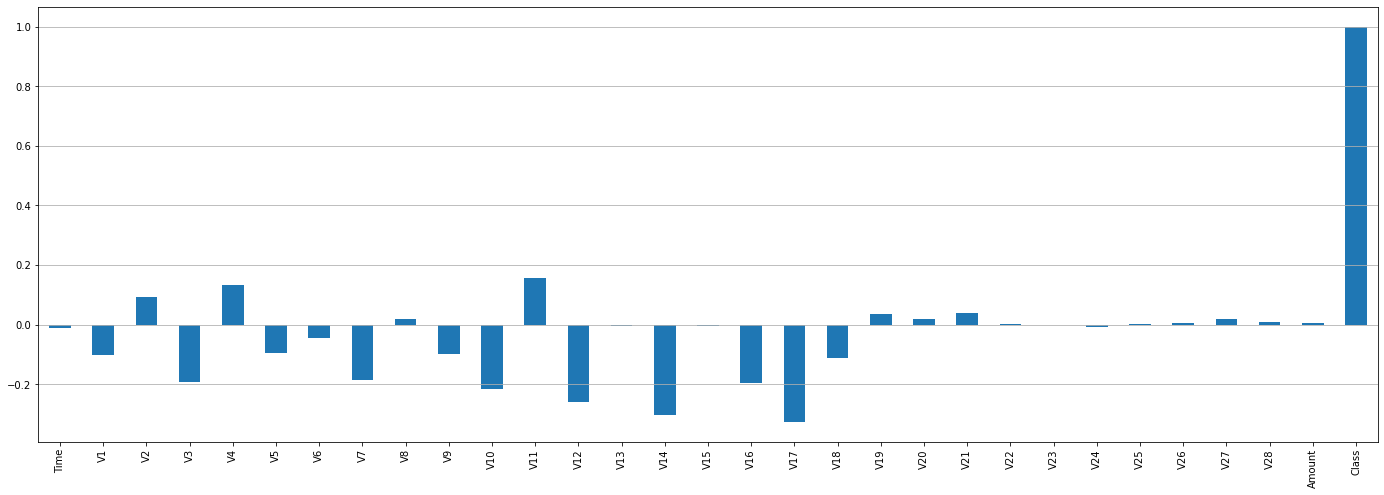

In [30]:
plt.figure(figsize=(24,8))
df.corr()['Class'].plot.bar()
plt.grid(axis='y')

Feature Selection

In [32]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [31]:
feat=ExtraTreesClassifier()

In [33]:
feat.fit(X,Y)

ExtraTreesClassifier()

In [36]:
imp=pd.Series(feat.feature_importances_,index=X.columns)

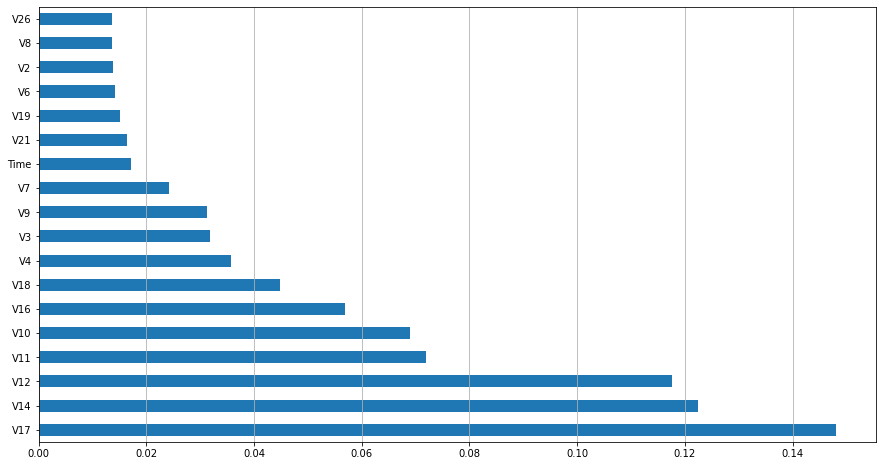

In [49]:
plt.figure(figsize=(15,8))
imp.nlargest(18).plot.barh()
plt.grid(axis='x')

Scenarios:
1. Taking all 28 features
2. Taking only 18 features

X_new of only 18 features

In [62]:
X_new=pd.DataFrame(df[imp.nlargest(18).index])

In [63]:
X_new.shape

(284807, 18)

In [65]:
X.shape

(284807, 30)

Splitting the data

In [66]:
strata=StratifiedKFold(n_splits=10)

In [69]:
for train_index,test_index in strata.split(X,Y):
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    Y_train,Y_test=Y.iloc[train_index],Y.iloc[test_index]

In [71]:
for train_index,test_index in strata.split(X_new,Y):
    X_new_train,X_new_test=X_new.iloc[train_index],X_new.iloc[test_index]
    Y_new_train,Y_new_test=Y.iloc[train_index],Y.iloc[test_index]

Model Selection

In [74]:
dec=DecisionTreeClassifier()
rf=RandomForestClassifier()

HyperParameter Tuning for RandomForestClassifier

In [91]:
n_estimators=[int(i) for i in np.linspace(100,2000,8)]
max_features=['auto','sqrt']
max_depth=[5,15,25]
min_samples_split=[2,10,30,60]
min_samples_leaf=[1,4,9]

Taking smaller sample

In [103]:
X_sample=df.iloc[:2000,:-1]
Y_sample=df.iloc[:2000,-1]

In [104]:
for train_index,test_index in strata.split(X_sample,Y_sample):
    X_sample_train,X_sample_test=X_sample.iloc[train_index],X_sample.iloc[test_index]
    Y_sample_train,Y_sample_test=Y_sample.iloc[train_index],Y_sample.iloc[test_index]

c:\Users\arunk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [105]:
parameters={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}
parameters

{'n_estimators': [100, 371, 642, 914, 1185, 1457, 1728, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 15, 25],
 'min_samples_split': [2, 10, 30, 60],
 'min_samples_leaf': [1, 4, 9]}

In [106]:
rf_model=RandomizedSearchCV(rf,
                            param_distributions=parameters,
                            scoring='neg_mean_squared_error',
                            n_jobs=1,
                            cv=5,
                            verbose=2,
                            random_state=42,
                            )

In [107]:
rf_model.fit(X_sample_train,Y_sample_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=642; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=642; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=642; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=642; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=642; total time=   0.0s


c:\Users\arunk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=30, n_estimators=1728; total time=   3.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=30, n_estimators=1728; total time=   3.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=30, n_estimators=1728; total time=   4.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=30, n_estimators=1728; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=30, n_estimators=1728; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=60, n_estimators=642; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=60, n_estimators=642; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=60, n_estimators=642; total time=   1.0s
[CV] END max_depth=15, max_featu

c:\Users\arunk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\arunk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\arunk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\arunk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 15, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 4, 9],
                                        'min_samples_split': [2, 10, 30, 60],
                                        'n_estimators': [100, 371, 642, 914,
                                                         1185, 1457, 1728,
                                                         2000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [108]:
rf_model.best_params_

{'n_estimators': 1728,
 'min_samples_split': 30,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5}

In [113]:
y_pred=rf_model.predict(X_test)

In [114]:
knn_mat=confusion_matrix(Y_test,y_pred)

In [116]:
print(f'Accuracy={np.ceil((knn_mat[0][0]+knn_mat[1][1])/knn_mat.sum()*100)}%\n')
print(f'Error Rate={np.ceil(((knn_mat[0][1]+knn_mat[1][0])/knn_mat.sum())*100)}%\n')
print(f'Precision={np.ceil((knn_mat[0][0])/(knn_mat[0][0]+knn_mat[1][0])*100)}%\n')
print(f'Recall={np.ceil((knn_mat[0][0])/(knn_mat[0][0]+knn_mat[0][1])*100)}%\n')

Accuracy=100.0%

Error Rate=1.0%

Precision=100.0%

Recall=100.0%

